# SR445A Gain Measurement

Function generator with sinusoidal signal @2MHz hooked up to each individual amplification stage.  
Measured the output signals with a RIGOL DS4034B scope, first without any amplification and subsequently for each amplification stage individually.  
For each stage the gain is ~4.92.

Function generator has some weird noise at extremities, but for rough measurement is good enough.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_signal(fname):
    with h5py.File(fname+'.hdf5', 'r') as f:
            attrs = dict(f['peaks/'].attrs)
            gain = float(attrs['y_increment'])
            offset = int(attrs['y_origin'])
            data = []
            for dset in f['peaks/']:
                values = (f['peaks/{0}'.format(dset)].value.astype(np.int16)-offset)*gain
                data.append((dset, values))
    return attrs['x_increment'], data

In [3]:
def fit_fun(x,ampA,ampB,omega,offset):
    return ampA*np.sin(omega*x)+ampB*np.cos(omega*x)+offset

In [4]:
data_loc = 'D:/SR445A Amplification/'

## No Amplification

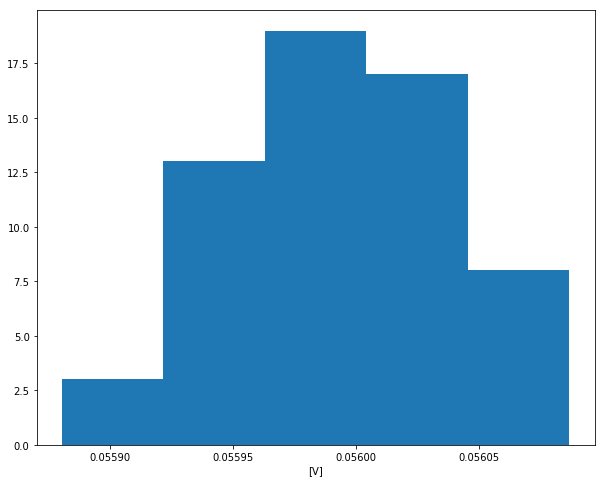

In [5]:
from scipy.optimize import curve_fit

dt, data_amp0 = load_signal(data_loc+'sinusoidal_ampcheck')

amp0 = []
for desc, curve in data_amp0:
    y = curve
    x = np.linspace(-len(y)//2,len(y)//2-1,len(y))*float(dt)
    p0 = (np.ptp(y), np.ptp(y), 2e6*2*np.pi,np.mean(y))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = p0)
    sigma = np.sqrt((np.sum((y-fit_fun(x, *popt))**2)/(len(y)-len(popt))))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = popt, sigma = np.ones(len(y))*sigma, absolute_sigma = True)
    amp0.append(np.sqrt(popt[0]**2+popt[1]**2))

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(amp0, bins = 5);
ax.set_xlabel('[V]');

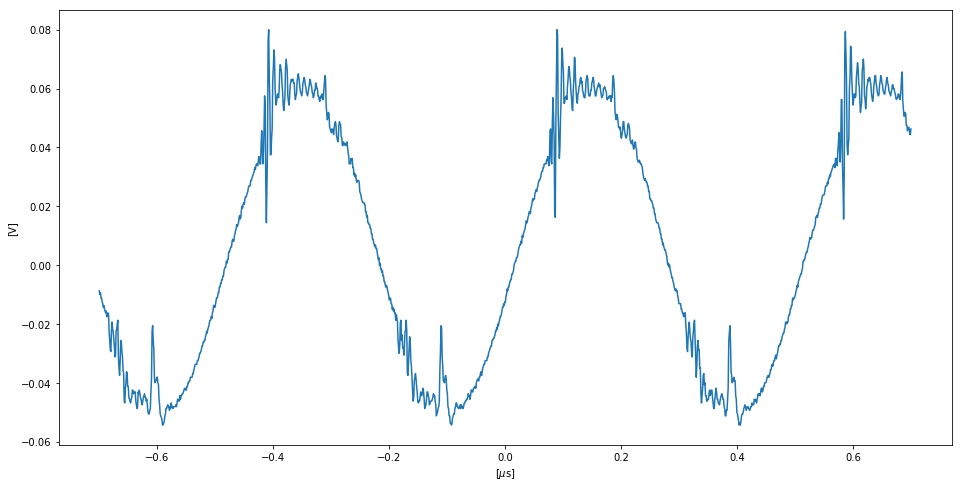

In [6]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(x*1e6,y)
ax.set_ylabel('[V]')
ax.set_xlabel(r'[$\mu$s]');

## Stage 1

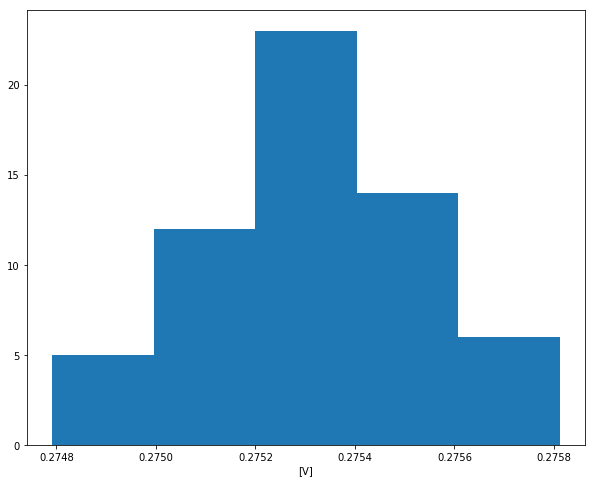

In [7]:
dt, data_amp1 = load_signal(data_loc+'sinusoidal_ampcheck_stage1')

amp1 = []
for desc, curve in data_amp1:
    y = curve
    x = np.linspace(-len(y)//2,len(y)//2-1,len(y))*float(dt)
    p0 = (np.ptp(y), np.ptp(y), 2e6*2*np.pi,np.mean(y))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = p0)
    sigma = np.sqrt((np.sum((y-fit_fun(x, *popt))**2)/(len(y)-len(popt))))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = popt, sigma = np.ones(len(y))*sigma, absolute_sigma = True)
    amp1.append(np.sqrt(popt[0]**2+popt[1]**2))

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(amp1, bins = 5)
ax.set_xlabel('[V]');

## Stage 2

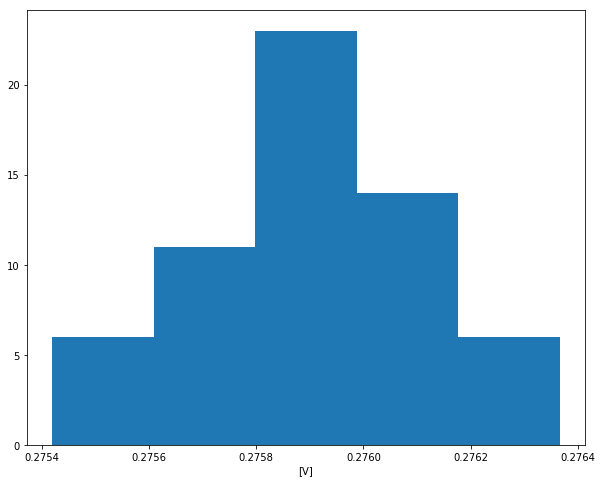

In [8]:
dt, data_amp2 = load_signal(data_loc+'sinusoidal_ampcheck_stage2')

amp2 = []
for desc, curve in data_amp2:
    y = curve
    x = np.linspace(-len(y)//2,len(y)//2-1,len(y))*float(dt)
    
    popt, pcov = curve_fit(fit_fun, x, y, p0 = p0)
    sigma = np.sqrt((np.sum((y-fit_fun(x, *popt))**2)/(len(y)-len(popt))))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = p0, sigma = np.ones(len(y))*sigma, absolute_sigma = True)
    amp2.append(np.sqrt(popt[0]**2+popt[1]**2))

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(amp2, bins = 5)
ax.set_xlabel('[V]');

## Stage 3

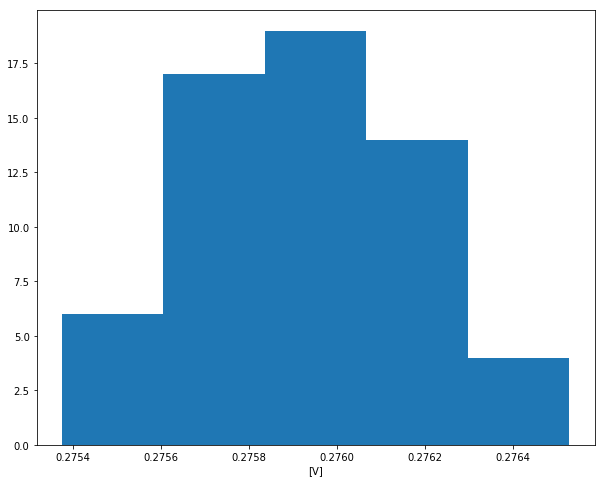

In [9]:
dt, data_amp3 = load_signal(data_loc+'sinusoidal_ampcheck_stage3')

amp3 = []
for desc, curve in data_amp3:
    y = curve
    x = np.linspace(-len(y)//2,len(y)//2-1,len(y))*float(dt)
    p0 = (np.ptp(y), np.ptp(y), 2e6*2*np.pi,np.mean(y))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = p0)
    sigma = np.sqrt((np.sum((y-fit_fun(x, *popt))**2)/(len(y)-len(popt))))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = popt, sigma = np.ones(len(y))*sigma, absolute_sigma = True)
    amp3.append(np.sqrt(popt[0]**2+popt[1]**2))

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(amp3, bins = 5)
ax.set_xlabel('[V]');

## Stage 4

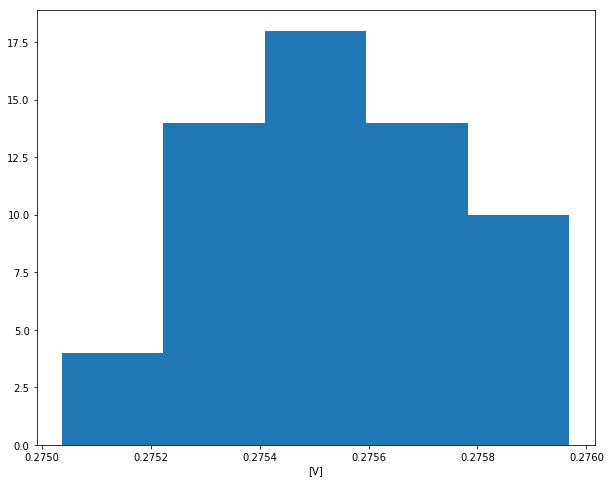

In [10]:
dt, data_amp4 = load_signal(data_loc+'sinusoidal_ampcheck_stage4')

amp4 = []
for desc, curve in data_amp4:
    y = curve
    x = np.linspace(-len(y)//2,len(y)//2-1,len(y))*float(dt)
    p0 = (np.ptp(y), np.ptp(y), 2e6*2*np.pi,np.mean(y))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = p0)
    sigma = np.sqrt((np.sum((y-fit_fun(x, *popt))**2)/(len(y)-len(popt))))
    popt, pcov = curve_fit(fit_fun, x, y, p0 = popt, sigma = np.ones(len(y))*sigma, absolute_sigma = True)
    amp4.append(np.sqrt(popt[0]**2+popt[1]**2))

fig, ax = plt.subplots(figsize = (10,8))
ax.hist(amp4, bins = 5)
ax.set_xlabel('[V]');

## Calculating Gain

stage 1 gain : 4.91688738525317
stage 2 gain : 4.927423944544377
stage 3 gain : 4.928109574443311
stage 4 gain : 4.921027276172954


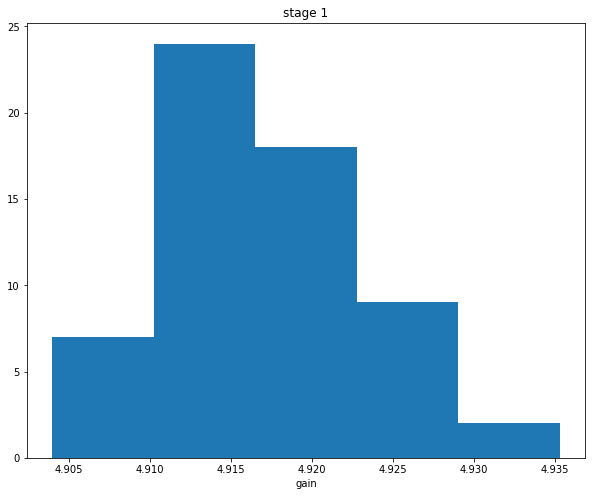

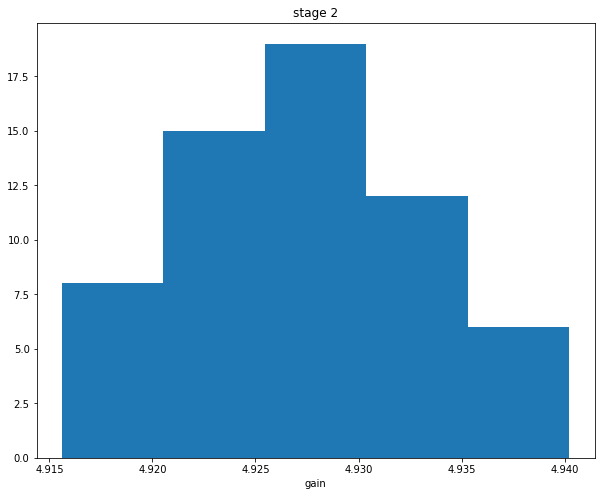

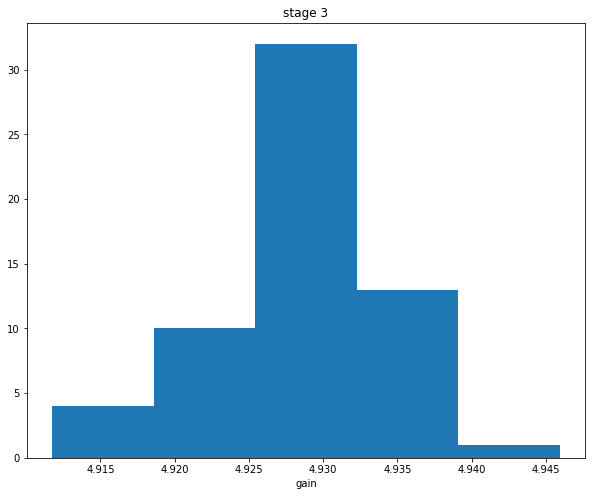

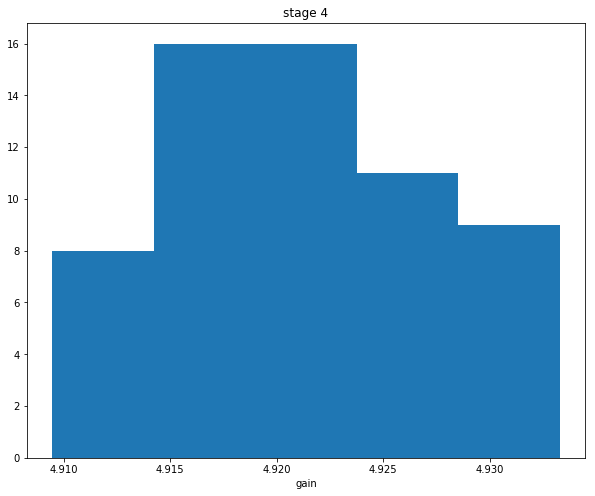

In [11]:
for i in range(1,5):
    fig, ax = plt.subplots(figsize = (10,8))
    ax.hist(eval('np.array(amp{})'.format(i))/np.array(amp0), bins = 5)
    print('stage {0} gain : {1}'.format(i,eval('np.mean(amp{0})'.format(i))/np.mean(amp0)))
    ax.set_xlabel('gain');
    ax.set_title('stage {}'.format(i));